In [5]:
#Python 3 notebook
import numpy as np
import pandas as pd
from functools import reduce
from math import floor, ceil


In [103]:
data = pd.read_csv('data.csv',header = 1, names =['date', 'prices', 'gold', 'compound', 'neg', 'neu', 'pos' ] )
data = data.set_index('date')
#Obtaining the past data in a different column
data['past_prices'] = data.loc[:,'prices'].shift(7)
data = data.iloc[7:data.shape[0]]
#Splitting train and test dataset
train_size = floor(0.8*data.shape[0])
train_data = data.iloc[0:train_size]
test_data = data.iloc[train_size:]
print('Total data size: ',data.shape[0],'. Train data size: ', train_data.shape[0], '. Test data size: ', test_data.shape[0], '.',sep='')


Total data size: 1175. Train data size: 940. Test data size: 235.


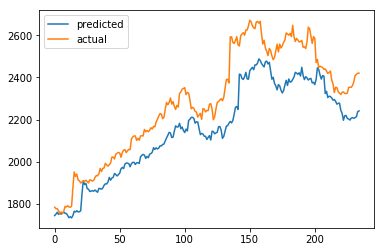

In [104]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error
mlpc = MLPRegressor(hidden_layer_sizes=(100, 200, 50) ,alpha=0.001, learning_rate_init = 0.001, activation='relu', solver='adam', shuffle=False)
mlpc.fit(train_data.loc[:,('past_prices','gold', 'compound', 'neg', 'neu', 'pos')].as_matrix(),train_data.loc[:,'prices'].as_matrix())
predicted = mlpc.predict(test_data.loc[:,('past_prices','gold', 'compound', 'neg', 'neu', 'pos')].as_matrix())
plt.plot( range(0,test_data.shape[0]), predicted, range(0,test_data.shape[0]), test_data.loc[:,'prices'].as_matrix())
plt.legend(['predicted','actual'])
plt.show()

In [106]:
# Evaluating the regressor
score = mlpc.score(train_data.loc[:,('past_prices','gold', 'compound', 'neg', 'neu', 'pos')].as_matrix(),train_data.loc[:,'prices'].as_matrix())
mean = mean_absolute_error(list(test_data.loc[:,'prices'].as_matrix()), list(predicted))
r2 = r2_score(list(test_data.loc[:,'prices'].as_matrix()), list(predicted))
print('Neural Networks Stats:\n\tScore: ',score,'. Mean Absolute Error: ',mean,'. R2 Score: ',r2, sep='')

from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent', random_state=0)
dummy.fit(train_data.loc[:,('past_prices','gold', 'compound', 'neg', 'neu', 'pos')].as_matrix(),train_data.loc[:,'prices'].as_matrix())
score_dummy = dummy.score(train_data.loc[:,('past_prices','gold', 'compound', 'neg', 'neu', 'pos')].as_matrix(),train_data.loc[:,'prices'].as_matrix())
predicted_dummy = dummy.predict(test_data.loc[:,('past_prices','gold', 'compound', 'neg', 'neu', 'pos')].as_matrix())
mean_dummy = mean_absolute_error(list(test_data.loc[:,'prices'].as_matrix()), list(predicted_dummy))
r2_dummy = r2_score(list(test_data.loc[:,'prices'].as_matrix()), list(predicted_dummy))

print('Dummy Stats:\n\tScore: ',score_dummy,'. Mean Absolute Error: ',mean_dummy,'. R2 Score: ',r2_dummy, sep='')



Neural Networks Stats:
	Score: 0.8916319607213767. Mean Absolute Error: 127.87701081706722. R2 Score: 0.6685277829354717
Dummy Stats:
	Score: 0.010638297872340425. Mean Absolute Error: 950.3914893617022. R2 Score: -13.85830681983024
